# Plotting Simple and Expotential Moving Averages in a Stock Price Chart

Import libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib import style
from pandas_datareader import data as pdr

Access the data from Yahoo! Finance 

In [2]:
yf.pdr_override() 

Ask the user to input a stock ticker and print it

In [3]:
stock_ticker = input('Enter a stock ticker: ') 
print(stock_ticker)

Enter a stock ticker: AAPL
AAPL


Ask the user to input a start date and print it

In [4]:
start_day, start_month, start_year = input('Enter a start date (dd mm yyyy): ').split()
start_date = start_day + '/' + start_month + '/' + start_year
start_time = dt.datetime(int(start_year), int(start_month), int(start_day))

Enter a start date (dd mm yyyy): 01 10 2020


Ask the user to input an end date and print it

In [5]:
end_day, end_month, end_year = input('Enter an end date (dd mm yyyy): ').split()
end_date = end_day + '/' + end_month + '/' + end_year
end_time = dt.datetime(int(end_year), int(end_month), int(end_day))

Enter an end date (dd mm yyyy): 11 11 2020


Print the start date and end date

In [6]:
print('From ' + start_date + ' to ' + end_date)

From 01/10/2020 to 11/11/2020


Ask the user to input simple moving average(s) and print them

In [7]:
list_of_sma = [sma for sma in map(int, input('Enter simple moving average(s) (in days, limited to 7): ').split())]
print(list_of_sma)

Enter simple moving average(s) (in days, limited to 7): 3 4
[3, 4]


Ask the user to input expotential moving average(s) and print them

In [8]:
list_of_ema = [ema for ema in map(int, input('Enter expotential moving average(s) (in days, limited to 7): ').split())]
print(list_of_ema)

Enter expotential moving average(s) (in days, limited to 7): 3
[3]


Load the dataframe from Yahoo! Finance and print it 

In [9]:
df = pdr.get_data_yahoo(stock_ticker, start_time, end_time) 
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-01  117.639999  117.720001  115.830002  116.790001  116.588860   
2020-10-02  112.889999  115.370003  112.220001  113.019997  112.825348   
2020-10-05  113.910004  116.650002  113.550003  116.500000  116.299355   
2020-10-06  115.699997  116.120003  112.250000  113.160004  112.965111   
2020-10-07  114.620003  115.550003  114.129997  115.080002  114.881805   
2020-10-08  116.250000  116.400002  114.589996  114.970001  114.771988   
2020-10-09  115.279999  117.000000  114.919998  116.970001  116.768547   
2020-10-12  120.059998  125.180000  119.279999  124.400002  124.185753   
2020-10-13  125.269997  125.389999  119.650002  121.099998  120.891434   
2020-10-14  121.000000  123.029999  119.620003  121.190002  120.981277   
2020-10-15  118.720001  121.199997  118.150

Save the dataframe as csv and load it into a dataframe

In [10]:
df.to_csv(stock_ticker + '.csv') 
df = pd.read_csv(stock_ticker + '.csv', parse_dates=True, index_col=0)

Calculate the simple moving average(s), append them to dataframe and print it 

In [11]:
sma_column_name = []

for day in list_of_sma:
    sma = int(day)
    df[str(sma) + "-day simple moving average"] = df['Adj Close'].rolling(window=sma).mean()
    sma_column_name.append(str(sma) + "-day simple moving average")

print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-01  117.639999  117.720001  115.830002  116.790001  116.588860   
2020-10-02  112.889999  115.370003  112.220001  113.019997  112.825348   
2020-10-05  113.910004  116.650002  113.550003  116.500000  116.299355   
2020-10-06  115.699997  116.120003  112.250000  113.160004  112.965111   
2020-10-07  114.620003  115.550003  114.129997  115.080002  114.881805   
2020-10-08  116.250000  116.400002  114.589996  114.970001  114.771988   
2020-10-09  115.279999  117.000000  114.919998  116.970001  116.768547   
2020-10-12  120.059998  125.180000  119.279999  124.400002  124.185753   
2020-10-13  125.269997  125.389999  119.650002  121.099998  120.891434   
2020-10-14  121.000000  123.029999  119.620003  121.190002  120.981277   
2020-10-15  118.720001  121.199997  118.150002  120.709999  120.502106   
2020-10-16  121.279999  121.550003  11

Calculate the expotential moving average(s), append them to the dataframe and print it 

In [12]:
ema_column_name = []

for day in list_of_ema:
    ema = int(day)
    df[str(ema) + "-day expotential moving average"] = df['Adj Close'].ewm(span=ema, adjust=False).mean()
    ema_column_name.append(str(ema) + "-day expotential moving average")
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-01  117.639999  117.720001  115.830002  116.790001  116.588860   
2020-10-02  112.889999  115.370003  112.220001  113.019997  112.825348   
2020-10-05  113.910004  116.650002  113.550003  116.500000  116.299355   
2020-10-06  115.699997  116.120003  112.250000  113.160004  112.965111   
2020-10-07  114.620003  115.550003  114.129997  115.080002  114.881805   
2020-10-08  116.250000  116.400002  114.589996  114.970001  114.771988   
2020-10-09  115.279999  117.000000  114.919998  116.970001  116.768547   
2020-10-12  120.059998  125.180000  119.279999  124.400002  124.185753   
2020-10-13  125.269997  125.389999  119.650002  121.099998  120.891434   
2020-10-14  121.000000  123.029999  119.620003  121.190002  120.981277   
2020-10-15  118.720001  121.199997  118.150002  120.709999  120.502106   
2020-10-16  121.279999  121.550003  11

Export the dataframe to CSV 

In [13]:
df.to_csv(stock_ticker + '.csv')

Set the key arguments for the main graph

In [14]:
kwargs = dict(type='candle', returnfig=True, volume=True, show_nontrading = True, ylabel='OHLC Candles', ylabel_lower='Shares Traded')

Plot the graph

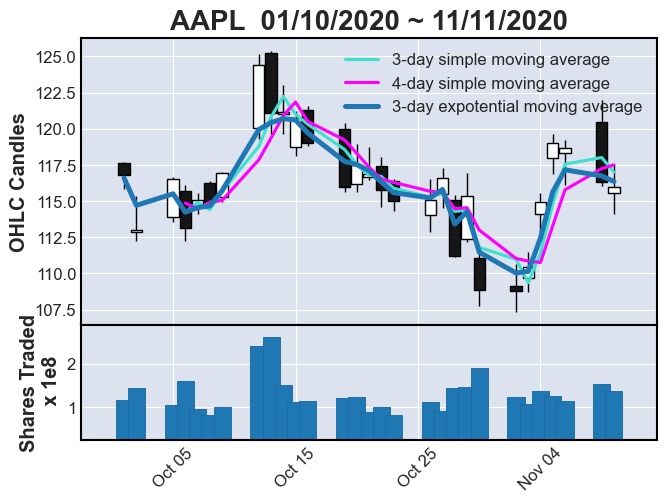

In [15]:
ema_columns = [column for column in df.columns if "-day expotential moving average" in column]
df_ema = df[ema_columns]
ema_plot = mpf.make_addplot(df_ema)
fig, axis = mpf.plot(df, mav=list_of_sma, addplot=ema_plot, **kwargs)
axis[0].set_title(stock_ticker + '  ' + start_date + ' ~ ' + end_date, fontsize=20, fontweight="bold")
axis[0].legend(sma_column_name + ema_column_name)
mpf.show()